## Classification

Datasets used :
- PoetryFoundationData.csv
- Poem_classification
- topics folder

Might be complicated to merge these datasets cause first one is multi label, second one contains 4 very large classes, and last one more than 100 very specific classes.

For multiclass classification, **Poem_classification** and **topics folder**:
- study data
- treatment to apply : remove \n ? remove punctuation ? remove poems with length < n ? lemmatization ?
- tokenizer : train own ? nltk ?
- embedding : countvectorizer ? tf-idf ? gensim ? word2vec ? own features ?
- Logistic Regression (might test other multiclass models)

For multilabel classification, **PoetryFoundationData.csv**:
- same as before
- vectorize labels
- https://www.linkedin.com/pulse/algorithms-multiclass-classification-amir-hossein-takbiri/

In [113]:
import pandas as pd
import numpy as np
import os
import string
import matplotlib.pyplot as plt
import statistics

from nltk.corpus import stopwords

#### Poem_classification - test/train_data.csv

In [9]:
tmp1 = pd.read_csv("../data_raw/Poem_classification - test_data.csv")
tmp2 = pd.read_csv("../data_raw/Poem_classification - train_data.csv")

df_Poem_classification = pd.concat([tmp1, tmp2], ignore_index=True)
df_Poem_classification.rename(columns={"Genre": "labels", "Poem": "poem"}, inplace=True)
df_Poem_classification = df_Poem_classification[["poem", "labels"]]

classes = np.unique(df_Poem_classification["labels"], return_counts=True)
for i in range(len(classes)):
    print(f"{classes[0][i]} : {classes[1][i]} samples")

Affection : 241 samples
Death : 247 samples
Environment : 252 samples
Music : 251 samples


In [14]:
print(df_Poem_classification.head()["poem"][0])

A woman walks by the bench I’m sitting onwith her dog that looks part Lab, part Buick,stops and asks if I would like to dance.I smile, tell her of course I do. We decideon a waltz that she begins to hum.


I tried to do a script which checks if each word is in the vocabulary from the nltk **brown** corpus, and if not split it with the most probable tokens but it didn't work that well.

#### topics folder

In [18]:
topics = os.listdir("../data_raw/topics")
df_topics_list = []
for topic in topics:
    files = os.listdir(f"../data_raw/topics/{topic}")
    df_topic = pd.DataFrame(columns=["poem", "labels"])
    i = 0
    for filename in files:
        with open(f"../data_raw/topics/{topic}/{filename}", encoding="utf8") as f:
            df_topic.loc[i] = {"poem": f.read(), "labels": topic}
        i += 1
    df_topics_list.append(df_topic)

df_topics = pd.concat(df_topics_list, ignore_index=True)

In [24]:
classes = np.unique(df_topics["labels"], return_counts=True)
print(f"Number of classes : {len(classes[1])}\n")
for i in range(len(classes[0])):
    print(f"{classes[0][i]} : {classes[1][i]} samples")

Number of classes : 144

alone : 100 samples
america : 100 samples
angel : 100 samples
anger : 98 samples
animal : 100 samples
baby : 100 samples
beach : 100 samples
beautiful : 100 samples
beauty : 100 samples
believe : 99 samples
birth : 100 samples
brother : 100 samples
butterfly : 100 samples
car : 98 samples
carpe diem : 99 samples
change : 99 samples
chicago : 98 samples
childhood : 99 samples
children : 100 samples
christmas : 100 samples
cinderella : 100 samples
city : 99 samples
courage : 98 samples
crazy : 100 samples
culture : 99 samples
dance : 100 samples
dark : 100 samples
daughter : 98 samples
death : 100 samples
depression : 99 samples
despair : 99 samples
destiny : 100 samples
dream : 100 samples
evil : 99 samples
faith : 99 samples
family : 100 samples
father : 99 samples
fear : 99 samples
fire : 100 samples
food : 100 samples
football : 99 samples
freedom : 99 samples
friend : 100 samples
frog : 100 samples
funeral : 99 samples
funny : 100 samples
future : 100 sample

As we can see, we have a really nice distributed number of sample for each one of the 144 different classes.

In [44]:
stop_words = stopwords.words("english")

In [48]:
test_string = df_topics.head()["poem"][0].replace("\n", " ").lower()

print(test_string)
print(" ".join([word for word in test_string.split() if word not in stop_words]))

loneliness his childhood warms him up loneliness he warms up to his childhood loneliness childhood his heaven loneliness his childhood a repository of warmth meditation my heart on a sea of sublimity so lonely a poem helps fill out the emptiness loneiness the world a graveyard so lonely i cheer up myself writing a poem about loneliness so lonely i write a poem  to fill out the emptiness
loneliness childhood warms loneliness warms childhood loneliness childhood heaven loneliness childhood repository warmth meditation heart sea sublimity lonely poem helps fill emptiness loneiness world graveyard lonely cheer writing poem loneliness lonely write poem fill emptiness


In [61]:
print(df_topics.iloc[0]["poem"].translate(str.maketrans('', '', string.punctuation)))

loneliness
his childhood
warms him up
loneliness
he warms up to
his childhood
loneliness
childhood
his heaven
loneliness
his childhood
a repository of warmth
meditation
my heart on
a sea of sublimity
so lonely
a poem helps fill out
the emptiness
loneiness
the world
a graveyard
so lonely
i cheer up myself
writing a poem about loneliness
so lonely
i write a poem  to fill out
the emptiness


In [ ]:
# only very few last lines of poems are not part of it, i.e. written by
for i in range(100, 200):
    print(i)
    print(df_topics.iloc[i]["poem"].split("\n")[-1])

In [77]:
df = df_topics
df["poem"] = df["poem"].str.replace("\n", " ").str.lower().str.translate(str.maketrans('', '', string.punctuation))
df["poem"] = df["poem"].apply(lambda poem: " ".join([word for word in poem.split() if word not in stop_words]))
print(len(df))

14334


In [80]:
df = df[df["poem"].str.len() > 20]
print(len(df))

14298


### Data analysis

In [108]:
text_df = pd.DataFrame(df["labels"])
text_df['len'] = df["poem"].apply(len)
print("Mean length of poems (in characters) : ", int(text_df['len'].mean()))
print("Min length of poems (in characters) : ", text_df['len'].min())
print("Max length of poems (in characters) : ", text_df['len'].max())

Mean length of poems (in characters) :  639
Min length of poems (in characters) :  21
Max length of poems (in characters) :  44594


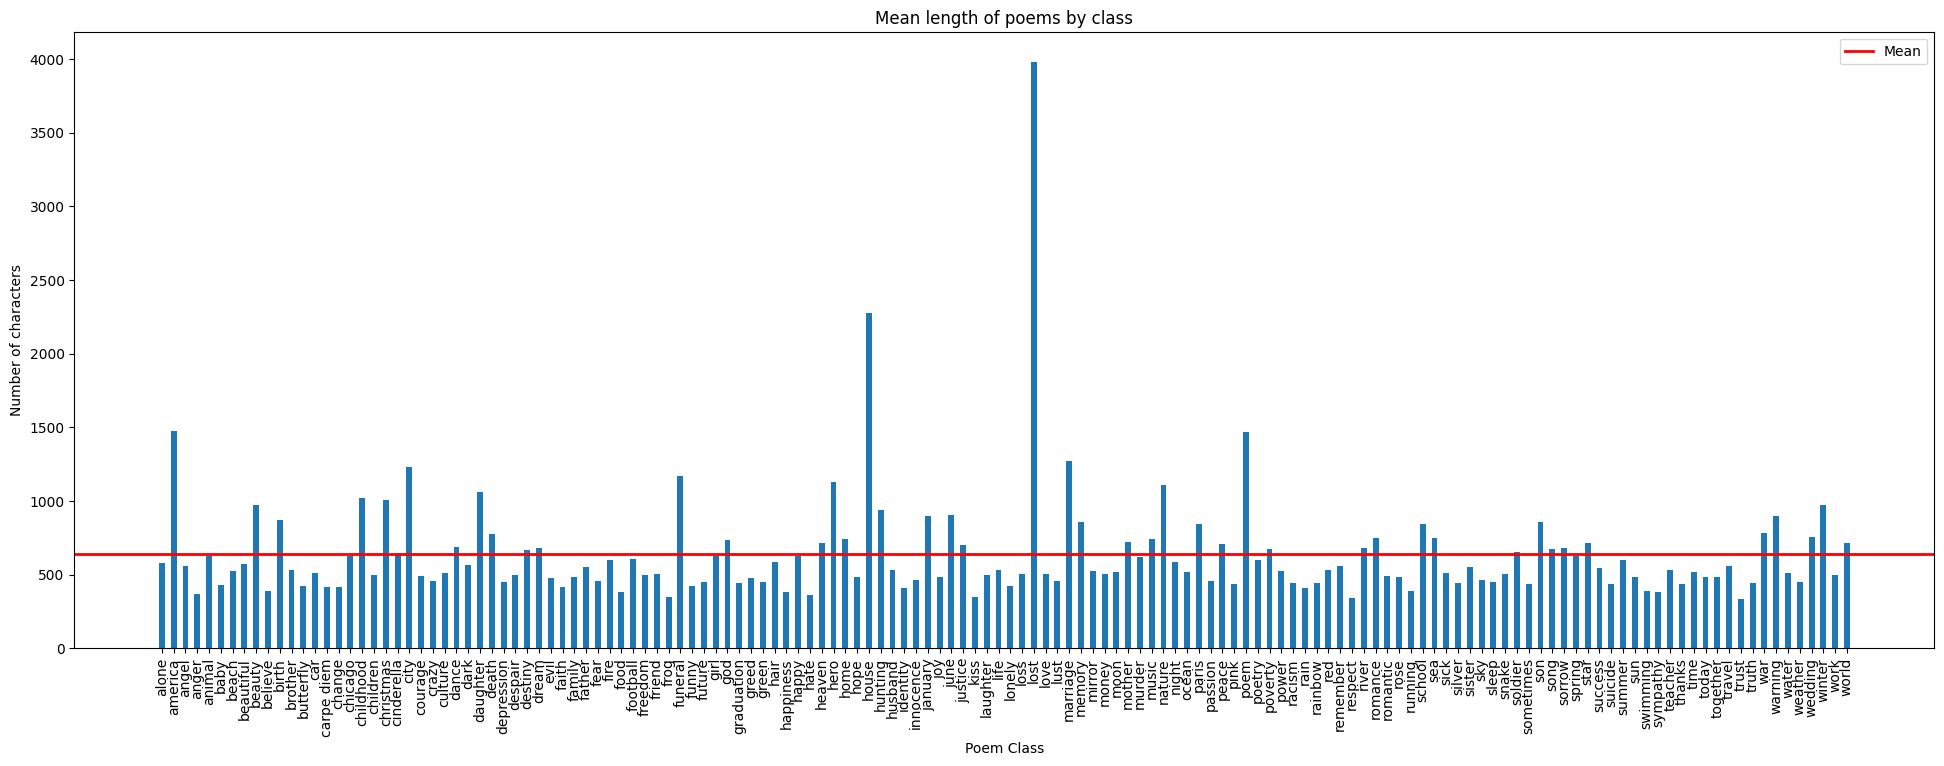

In [107]:
df_mean_length = text_df.groupby('labels').mean().reset_index()

plt.figure(figsize=(24, 8))
plt.bar(x=df_mean_length["labels"], height=df_mean_length["len"], width=0.5)

plt.xlabel('Poem Class')
plt.ylabel('Number of characters')
plt.title('Mean length of poems by class')
plt.axhline(y=int(text_df['len'].mean()), color='r', linestyle='-', linewidth=2, label='Mean')
plt.legend()

plt.xticks(rotation=90)

plt.show()

Since almost all classes have poems of same length, it won't be an useful feature to use.

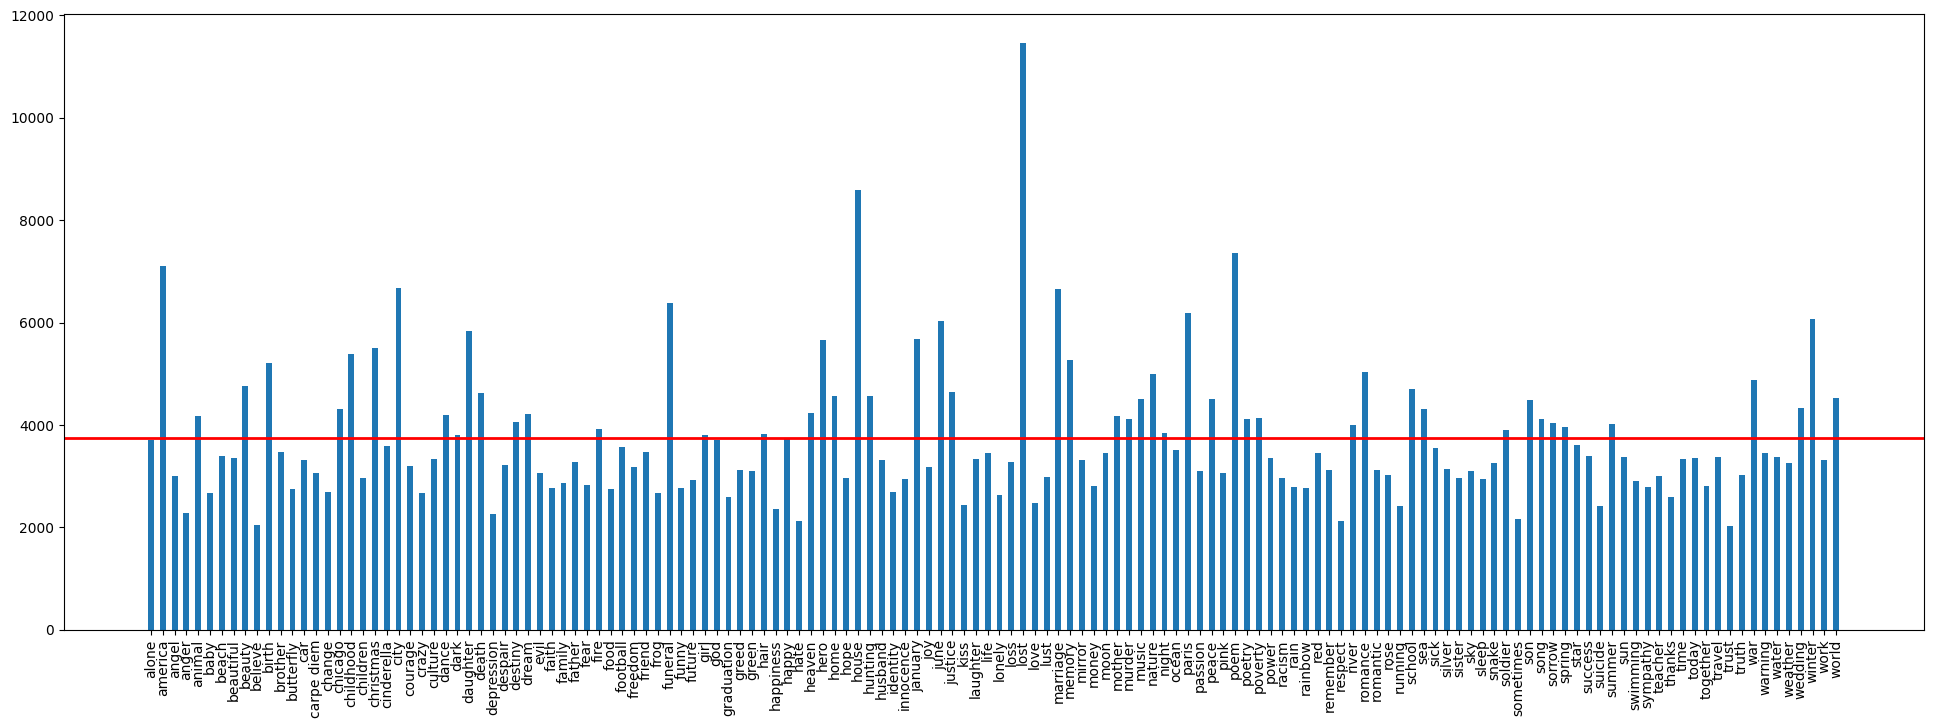

In [114]:
vocab_length_by_label = []
labels = np.unique(df["labels"])
for label in labels:
    vocab_length_by_label.append(len(set(" ".join(list(df[df["labels"] == label]["poem"])).split())))

plt.figure(figsize=(24, 8))
plt.bar(x=labels, height=vocab_length_by_label, width=0.5)

plt.axhline(y=statistics.mean(vocab_length_by_label), color='r', linestyle='-', linewidth=2, label='Mean')
plt.xticks(rotation=90)

plt.show()